In [11]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('D:/MPR Project/dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/MPR Project/dataset/test\apple\Image_1.jpg
D:/MPR Project/dataset/test\apple\Image_10.jpg
D:/MPR Project/dataset/test\apple\Image_2.jpg
D:/MPR Project/dataset/test\apple\Image_3.jpg
D:/MPR Project/dataset/test\apple\Image_4.jpg
D:/MPR Project/dataset/test\apple\Image_5.jpg
D:/MPR Project/dataset/test\apple\Image_6.JPG
D:/MPR Project/dataset/test\apple\Image_7.jpg
D:/MPR Project/dataset/test\apple\Image_8.jpg
D:/MPR Project/dataset/test\apple\Image_9.jpg
D:/MPR Project/dataset/test\banana\Image_1.jpg
D:/MPR Project/dataset/test\banana\Image_10.jpg
D:/MPR Project/dataset/test\banana\Image_2.jpg
D:/MPR Project/dataset/test\banana\Image_3.jpg
D:/MPR Project/dataset/test\banana\Image_4.jpg
D:/MPR Project/dataset/test\banana\Image_5.jpg
D:/MPR Project/dataset/test\banana\Image_6.jpg
D:/MPR Project/dataset/test\banana\Image_8.jpg
D:/MPR Project/dataset/test\banana\Image_9.jpg
D:/MPR Project/dataset/test\beetroot\Image_1.jpg
D:/MPR Project/dataset/test\beetroot\Image_10.jpg
D:/MPR Project/d

In [12]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.17.0


In [13]:
train_dir = Path('D:/MPR Project/dataset/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))
#print(train_filepaths)

In [14]:
test_dir = Path('D:/MPR Project/dataset')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))
#print(test_filepaths)

In [15]:
val_dir = Path('D:/MPR Project/dataset/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [16]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """
    global labels
    labels = [str(filepath[i]).split("\\")[-2] for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [17]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [18]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['sweetpotato' 'potato' 'pineapple' 'eggplant' 'paprika' 'spinach'
 'capsicum' 'onion' 'corn' 'grapes' 'watermelon' 'lettuce' 'sweetcorn'
 'raddish' 'peas' 'bell pepper' 'chilli pepper' 'cabbage' 'soy beans'
 'ginger' 'lemon' 'tomato' 'mango' 'jalepeno' 'orange' 'beetroot' 'carrot'
 'garlic' 'banana' 'turnip' 'pomegranate' 'kiwi' 'apple' 'cucumber' 'pear'
 'cauliflower']


In [19]:
train_df.head(5)

,Filepath,Label
0,D:\MPR Project\dataset\train\sweetpotato\Image...,sweetpotato
1,D:\MPR Project\dataset\train\potato\Image_29.jpg,potato
2,D:\MPR Project\dataset\train\pineapple\Image_3...,pineapple
3,D:\MPR Project\dataset\train\eggplant\Image_19...,eggplant
4,D:\MPR Project\dataset\train\paprika\Image_74.jpg,paprika


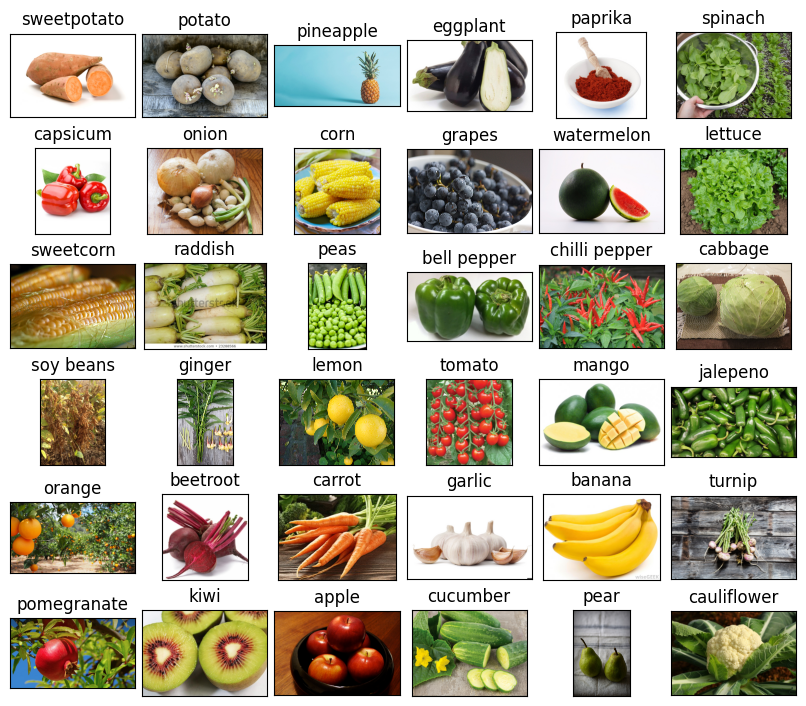

In [20]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [21]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [22]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2855 validated image filenames belonging to 36 classes.


In [23]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 3535 validated image filenames belonging to 36 classes.


In [24]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 3535 validated image filenames belonging to 36 classes.


In [25]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [26]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

c:\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 766s 8s/step - accuracy: 0.3445 - loss: 2.5137 - val_accuracy: 0.7836 - val_loss: 0.6804
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 717s 8s/step - accuracy: 0.7900 - loss: 0.6229 - val_accuracy: 0.8984 - val_loss: 0.3453
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 724s 8s/step - accuracy: 0.8843 - loss: 0.3448 - val_accuracy: 0.9347 - val_loss: 0.2283
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 711s 8s/step - accuracy: 0.9339 - loss: 0.2195 - val_accuracy: 0.9635 - val_loss: 0.1495
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 728s 8s/step - accuracy: 0.9611 - loss: 0.1372 - val_accuracy: 0.9717 - val_loss: 0.1098
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 763s 8s/step - accuracy: 0.9656 - loss: 0.1132 - val_accuracy: 0.9813 - val_loss: 0.0907
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 718s 8s/step - accuracy: 0.9770 - loss: 0.0827 - val_accuracy: 0.9842 - val_loss: 0.0783
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 709s 8s/step - accuracy: 0.9851 - loss: 0.0599 - val_accuracy: 0.9864 - v

In [27]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [31]:
print(output("D:/Downloads/Peas_in_pods_-_Studio.jpg"))
#banana
print(output("D:/MPR Project/dataset/test/carrot/Image_1.jpg"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
beetroot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
apple


In [29]:
model.save('FV.h5')